In [6]:
import polaris as po
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# load the dataset from the Hub
dataset = po.load_dataset("asap-discovery/antiviral-potency-2025-unblinded")
# dataset.cache()
# convert to dataframe
df = pd.DataFrame(dataset[:
])

[2025-09-04 10:54:54] INFO     The version of Polaris that was used to create the artifact          ]8;id=371765;file:///Users/s1905547_1_2/anaconda3/envs/boltz_polaris/lib/python3.12/site-packages/polaris/_artifact.py\_artifact.py]8;;\:]8;id=386376;file:///Users/s1905547_1_2/anaconda3/envs/boltz_polaris/lib/python3.12/site-packages/polaris/_artifact.py#96\96]8;;\
                               (0.11.8.dev4+g40e3b2b.d20250207) is different from the currently                    
                               installed version of Polaris (0.13.0).                                              

                      WARNING  You're loading data from a remote location. If the dataset is small     ]8;id=416474;file:///Users/s1905547_1_2/anaconda3/envs/boltz_polaris/lib/python3.12/site-packages/polaris/dataset/_base.py\_base.py]8;;\:]8;id=188607;file:///Users/s1905547_1_2/anaconda3/envs/boltz_polaris/lib/python3.12/site-packages/polaris/dataset/_base.py#187\187]8;;\
                               enough, consider caching the dataset first using DatasetV2.cache() for              
                               more performant data access.                                                        

[10:54:55]  Success: Fetching dataset                                                                 ]8;id=776419;file:///Users/s1905547_1_2/anaconda3/envs/boltz_polaris/lib/python3.12/site-packages/polaris/utils/context.py\context.py]8;;\:]8;id=636673;file:///Users/s1905547_1_2/anaconda3/envs/boltz_polaris/lib/python3.12/site-packages/polaris/utils/context.py#53\53]8;;\

In [7]:
df_test = df[df['Set'] == 'Test']  # Display the first 5 rows of the test set

In [8]:
boltz_prediction = pd.read_csv("boltz_affinity_predictions.csv")
boltz_prediction.head()
boltz_prediction['pIC50'] = (6 - boltz_prediction['affinity_pred_value']) 

In [9]:
boltz_prediction

,affinity_pred_value,affinity_probability_binary,affinity_pred_value1,affinity_probability_binary1,affinity_pred_value2,affinity_probability_binary2,molecule_name,target_protein,file_path,pIC50
0,-3.375027,0.994437,-3.791646,0.999995,-2.958407,0.988878,ASAP-0027780,MERS,/home/auro/University/Boltz_Potency_Polaris/bo...,9.375027
1,-1.196189,0.986935,-1.685289,0.999354,-0.707089,0.974516,ASAP-0031981,MERS,/home/auro/University/Boltz_Potency_Polaris/bo...,7.196189
2,-0.342769,0.926003,-0.607864,0.981018,-0.077673,0.870989,ASAP-0032168,SARS,/home/auro/University/Boltz_Potency_Polaris/bo...,6.342769
3,-2.798337,0.993797,-3.183520,0.999989,-2.413154,0.987605,ASAP-0017685,SARS,/home/auro/University/Boltz_Potency_Polaris/bo...,8.798337
4,-2.372261,0.994172,-2.424898,0.999858,-2.319625,0.988486,ASAP-0015679,SARS,/home/auro/University/Boltz_Potency_Polaris/bo...,8.372261
...,...,...,...,...,...,...,...,...,...,...
587,-0.982503,0.976201,-1.089004,0.994337,-0.876002,0.958064,ASAP-0011408,MERS,/home/auro/University/Boltz_Potency_Polaris/bo...,6.982503
588,0.131832,0.966215,-0.462745,0.999539,0.726410,0.932891,ASAP-0028872,SARS,/home/auro/University/Boltz_Potency_Polaris/bo...,5.868168
589,-2.671089,0.993871,-2.812935,0.999971,-2.529243,0.987771,ASAP-0016902,SARS,/home/auro/University/Boltz_Potency_Polaris/bo...,8.671089
590,-1.352305,0.990854,-1.492270,0.997949,-1.212341,0.983759,ASAP-0011036,MERS,/home/auro/University/Boltz_Potency_Polaris/bo...,7.352305


In [10]:
# Convert boltz_prediction from long to wide format
boltz_wide = boltz_prediction.pivot_table(
    index='molecule_name', 
    columns='target_protein', 
    values='pIC50', 
    aggfunc='first'
).reset_index()

# Rename columns to match experimental data format
boltz_wide.columns.name = None  # Remove the column index name
boltz_wide = boltz_wide.rename(columns={
    'molecule_name': 'Molecule Name',
    'MERS': 'pIC50 (MERS-CoV Mpro)',
    'SARS': 'pIC50 (SARS-CoV-2 Mpro)'
})

# Display the result
print("Reshaped Boltz predictions:")
print(boltz_wide.head())
print(f"\nShape: {boltz_wide.shape}")
print(f"Columns: {boltz_wide.columns.tolist()}")

Reshaped Boltz predictions:
  Molecule Name  pIC50 (MERS-CoV Mpro)  pIC50 (SARS-CoV-2 Mpro)
0  ASAP-0000175               7.132423                 6.615579
1  ASAP-0000272               8.266680                 8.425763
2  ASAP-0000528               8.606447                 8.691602
3  ASAP-0000541               8.073647                 8.096035
4  ASAP-0000733               8.609251                 8.491444

Shape: (296, 3)
Columns: ['Molecule Name', 'pIC50 (MERS-CoV Mpro)', 'pIC50 (SARS-CoV-2 Mpro)']


In [11]:
# Check if any molecule in df_test['Molecule Name'] is missing in boltz_wide['Molecule Name']
missing_in_boltz = set(df_test['Molecule Name']) - set(boltz_wide['Molecule Name'])
print(f"Molecules in df_test not in boltz_wide: {missing_in_boltz}")
# remove molecules in df_test that are not in boltz_wide
df_test = df_test[df_test['Molecule Name'].isin(boltz_wide['Molecule Name'])]
# 'ASAP-0015666' is not in boltz predictions because there was an error from Boltz 
# WARNING: RDKit ETKDGv3 failed to generate a conformer for molecule C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(CCN1C[C@H]3CC[C@H](C1)O3)C(=O)c1ccc(Cl)cc12, so the program will start with random coordinates. Note that the performance of the model under this behaviour was not tested.
# Failed to process ../yaml_files/ASAP-0015666_SARS.yaml. Skipping. Error: Failed to compute 3D conformer for C[C@H]1CN(c2cncc3ccccc23)C(=O)[C@@]12CN(CCN1C[C@H]3CC[C@H](C1)O3)C(=O)c1ccc(Cl)cc12.


Molecules in df_test not in boltz_wide: {'ASAP-0015666'}


In [12]:
from evaluation.potency import evaluate_potency_predictions,evaluate_all_potency_predictions

In [13]:
# can you make sure the order by Molecule Name is the same in both dataframes?
boltz_wide = boltz_wide.sort_values(by='Molecule Name').reset_index(drop=True)
df_test = df_test.sort_values(by='Molecule Name').reset_index(drop=True)

In [14]:
df_test

,CXSMILES,Molecule Name,Set,pIC50 (MERS-CoV Mpro),pIC50 (SARS-CoV-2 Mpro)
0,C=CC(=O)NC1=CC=CC(N(CC2=CC=CC(Cl)=C2)C(=O)CC2=...,ASAP-0000175,Test,5.52,5.57
1,CNC(=O)CN1C[C@@]2(C(=O)N(C3=CN=CC4=CC=CC=C34)C...,ASAP-0000272,Test,6.47,NaN
2,CNC(=O)CN1C[C@]2(CCN(C3=CN=CC4=CC=C(OC[C@H](O)...,ASAP-0000528,Test,5.80,7.44
3,CNC(=O)CN1C[C@@]2(C(=O)N(C3=CN=CC4=CC=CC=C34)C...,ASAP-0000541,Test,5.81,6.48
4,CNC(=O)CN1C[C@@]2(C(=O)N(C3=CN=CC4=CC=CC=C34)C...,ASAP-0000733,Test,6.69,7.87
...,...,...,...,...,...
291,O=C(CC1=CN=CC2=CC=CC=C12)N1CCCC[C@H]1[C@H]1CCC...,ASAP-0032561,Test,4.54,4.20
292,O=C(CC1=CN=CC2=CC=CC=C12)N1CCCC[C@H]1[C@H]1CCC...,ASAP-0032562,Test,4.42,NaN
293,O=C(CC1=CN=CC2=CC=CC=C12)N1CCC[C@H]2CCCC[C@@H]...,ASAP-0032572,Test,4.84,5.18
294,COC1=CC=CC=C1[C@H]1C[C@H](C)CCN1C(=O)CC1=CN=CC...,ASAP-0032604,Test,5.53,5.59


In [15]:
boltz_wide_dict = {
    "boltz2":boltz_wide,
}

In [16]:
df_test

,CXSMILES,Molecule Name,Set,pIC50 (MERS-CoV Mpro),pIC50 (SARS-CoV-2 Mpro)
0,C=CC(=O)NC1=CC=CC(N(CC2=CC=CC(Cl)=C2)C(=O)CC2=...,ASAP-0000175,Test,5.52,5.57
1,CNC(=O)CN1C[C@@]2(C(=O)N(C3=CN=CC4=CC=CC=C34)C...,ASAP-0000272,Test,6.47,NaN
2,CNC(=O)CN1C[C@]2(CCN(C3=CN=CC4=CC=C(OC[C@H](O)...,ASAP-0000528,Test,5.80,7.44
3,CNC(=O)CN1C[C@@]2(C(=O)N(C3=CN=CC4=CC=CC=C34)C...,ASAP-0000541,Test,5.81,6.48
4,CNC(=O)CN1C[C@@]2(C(=O)N(C3=CN=CC4=CC=CC=C34)C...,ASAP-0000733,Test,6.69,7.87
...,...,...,...,...,...
291,O=C(CC1=CN=CC2=CC=CC=C12)N1CCCC[C@H]1[C@H]1CCC...,ASAP-0032561,Test,4.54,4.20
292,O=C(CC1=CN=CC2=CC=CC=C12)N1CCCC[C@H]1[C@H]1CCC...,ASAP-0032562,Test,4.42,NaN
293,O=C(CC1=CN=CC2=CC=CC=C12)N1CCC[C@H]2CCCC[C@@H]...,ASAP-0032572,Test,4.84,5.18
294,COC1=CC=CC=C1[C@H]1C[C@H](C)CCN1C(=O)CC1=CN=CC...,ASAP-0032604,Test,5.53,5.59


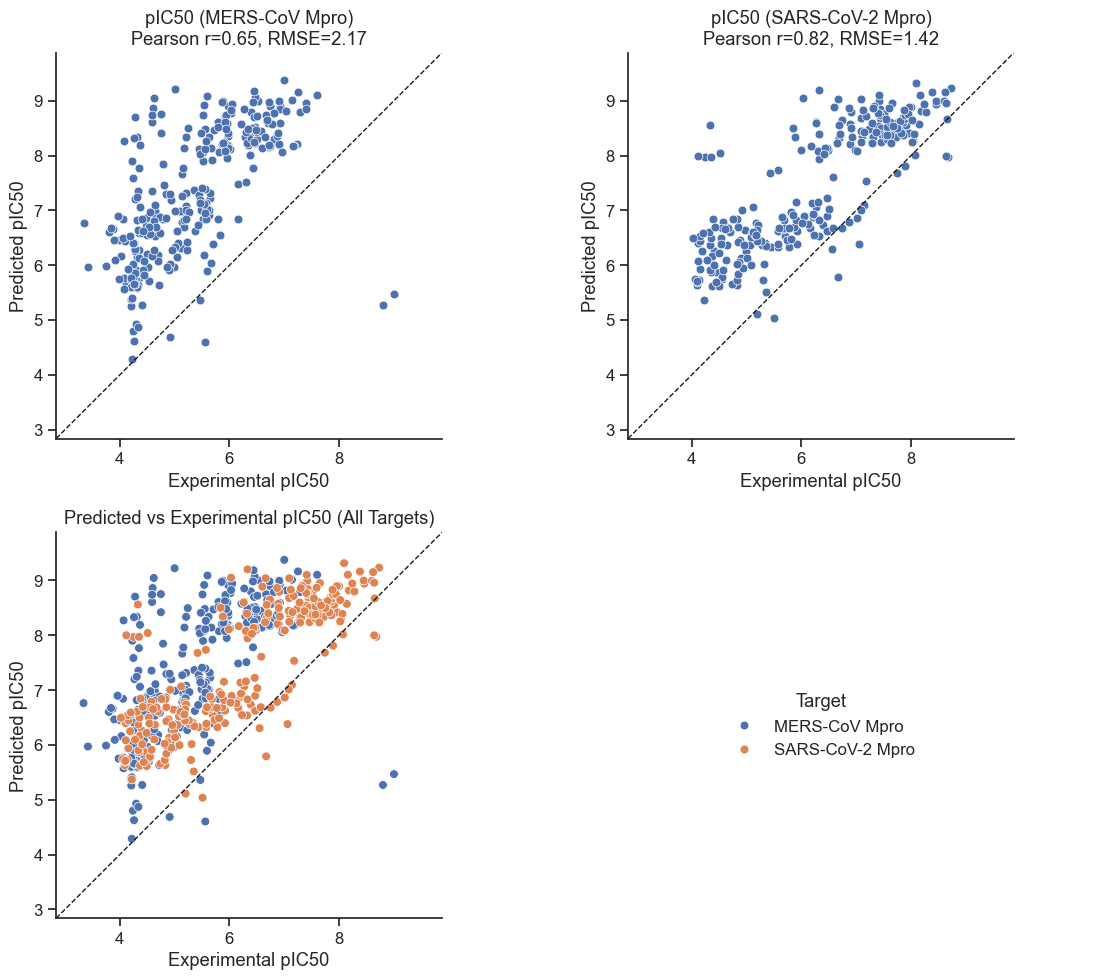

Saved: pred_vs_exp_grid.png


In [17]:
sns.set(style="ticks", context="notebook", font_scale=1.1)

# Inputs expected to exist in the workspace:
# - boltz_wide_dict['boltz2'] (predictions)
# - df_test (experimental)

# Targets to plot
targets = [
    "pIC50 (MERS-CoV Mpro)",
    "pIC50 (SARS-CoV-2 Mpro)",
]

# Prepare data
pred_df = boltz_wide_dict['boltz2'].copy()
exp_df  = df_test.copy()

cols = ["Molecule Name"] + targets
pred_df = pred_df[cols].copy()
exp_df  = exp_df[cols].copy()
for t in targets:
    pred_df[t] = pd.to_numeric(pred_df[t], errors="coerce")
    exp_df[t]  = pd.to_numeric(exp_df[t], errors="coerce")

# Merge on Molecule Name
merged = exp_df.merge(pred_df, on="Molecule Name", suffixes=("_exp", "_pred"))

# Helpers
def identity_limits(x, y, pad=0.5):
    m = np.nanmin([np.nanmin(x), np.nanmin(y)])
    M = np.nanmax([np.nanmax(x), np.nanmax(y)])
    return (m - pad, M + pad)

def metrics(y_true, y_pred):
    mask = ~(np.isnan(y_true) | np.isnan(y_pred))
    yt, yp = y_true[mask], y_pred[mask]
    if yt.size == 0:
        return np.nan, np.nan
    r = np.corrcoef(yt, yp)[0, 1]
    rmse = np.sqrt(np.mean((yt - yp) ** 2))
    return r, rmse

# Long format for combined panel
long_rows = []
for t in targets:
    tmp = merged[["Molecule Name", f"{t}_exp", f"{t}_pred"]].copy()
    tmp["target"] = t.replace("pIC50 (", "").replace(")", "")
    tmp.rename(columns={f"{t}_exp": "Experimental", f"{t}_pred": "Predicted"}, inplace=True)
    long_rows.append(tmp)
long_df = pd.concat(long_rows, ignore_index=True).dropna(subset=["Experimental", "Predicted"])

# Global limits shared across panels
exp_cols = [f"{t}_exp" for t in targets]
pred_cols = [f"{t}_pred" for t in targets]
x_all = merged[exp_cols].to_numpy(dtype=float).ravel()
y_all = merged[pred_cols].to_numpy(dtype=float).ravel()
mask_all = ~(np.isnan(x_all) | np.isnan(y_all))
lo, hi = identity_limits(x_all[mask_all], y_all[mask_all], pad=0.5)

# Figure: 2x2 grid (two per-target, one combined, one legend)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
ax_per_target = [axes[0,0], axes[0,1]]

# Per-target panels
for ax, t in zip(ax_per_target, targets):
    x = merged[f"{t}_exp"].values
    y = merged[f"{t}_pred"].values
    df_plot = pd.DataFrame({"Experimental": x, "Predicted": y}).dropna()
    sns.scatterplot(data=df_plot, x="Experimental", y="Predicted", ax=ax, s=40, edgecolor="white", linewidth=0.5)
    ax.plot([lo, hi], [lo, hi], ls="--", c="k", lw=1)
    ax.set_xlim(lo, hi)
    ax.set_ylim(lo, hi)
    r, rmse = metrics(df_plot["Experimental"].values, df_plot["Predicted"].values)
    ax.set_title(f"{t}\nPearson r={r:.2f}, RMSE={rmse:.2f}")
    ax.set_aspect("equal", adjustable="box")
    ax.set_xlabel("Experimental pIC50")
    ax.set_ylabel("Predicted pIC50")

# Combined panel
ax_c = axes[1,0]
sns.scatterplot(
    data=long_df,
    x="Experimental",
    y="Predicted",
    hue="target",
    s=40,
    edgecolor="white",
    linewidth=0.5,
    ax=ax_c
)
ax_c.plot([lo, hi], [lo, hi], ls="--", c="k", lw=1)
ax_c.set_xlim(lo, hi)
ax_c.set_ylim(lo, hi)
ax_c.set_aspect("equal", adjustable="box")
ax_c.set_title("Predicted vs Experimental pIC50 (All Targets)")
ax_c.set_xlabel("Experimental pIC50")
ax_c.set_ylabel("Predicted pIC50")

# Legend panel
ax_leg = axes[1,1]
ax_leg.axis("off")
handles, labels = ax_c.get_legend_handles_labels()
if labels and labels[0].lower() == "target":
    handles, labels = handles[1:], labels[1:]
ax_leg.legend(handles, labels, title="Target", frameon=False, loc="center")
leg = ax_c.get_legend()
if leg is not None:
    leg.remove()

sns.despine(fig=fig)
fig.tight_layout()

# Save and show
out_path = "pred_vs_exp_grid.png"
fig.savefig(out_path, dpi=300, bbox_inches="tight")
plt.show()
print(f"Saved: {out_path}")

In [18]:
results_2 = evaluate_all_potency_predictions(df_test, boltz_wide_dict)

In [19]:
results_2

{'aggregated':    method    kendall_tau mean_absolute_error mean_squared_error  \
 0  boltz2  0.565 ± 0.019       1.641 ± 0.031      3.397 ± 0.128   
 
         pearsonr              r2      spearmanr  
 0  0.741 ± 0.033  -1.930 ± 0.203  0.756 ± 0.022  ,
 'pIC50 (MERS-CoV Mpro)':    method    kendall_tau mean_absolute_error mean_squared_error  \
 0  boltz2  0.524 ± 0.029       2.032 ± 0.046      4.739 ± 0.215   
 
         pearsonr              r2      spearmanr  
 0  0.657 ± 0.062  -3.706 ± 0.396  0.706 ± 0.037  ,
 'pIC50 (SARS-CoV-2 Mpro)':    method    kendall_tau mean_absolute_error mean_squared_error  \
 0  boltz2  0.606 ± 0.026       1.249 ± 0.042      2.054 ± 0.147   
 
         pearsonr              r2      spearmanr  
 0  0.824 ± 0.024  -0.155 ± 0.094  0.807 ± 0.023  }

In [20]:
# Read the leaderboard data
aggregated_df = pd.read_csv('leaderboards/antiviral-potency-2025/aggregated.csv')
mers_df = pd.read_csv('leaderboards/antiviral-potency-2025/pIC50 (MERS-CoV Mpro).csv')
sars_df = pd.read_csv('leaderboards/antiviral-potency-2025/pIC50 (SARS-CoV-2 Mpro).csv')

print("Data loaded successfully!")
print(f"Aggregated: {aggregated_df.shape}")
print(f"MERS: {mers_df.shape}")
print(f"SARS: {sars_df.shape}")

Data loaded successfully!
Aggregated: (32, 10)
MERS: (32, 9)
SARS: (32, 9)


In [21]:
# Function to extract value and error from "value ± error" format
def extract_value_error(value_str):
    if '±' in str(value_str):
        parts = str(value_str).split(' ± ')
        return float(parts[0]), float(parts[1])
    else:
        return float(value_str), 0

# Prepare Boltz2 results from your results_2 data
boltz2_results_agg = results_2['aggregated'].iloc[0].to_dict()
boltz2_mers_results = results_2['pIC50 (MERS-CoV Mpro)'].iloc[0].to_dict()
boltz2_sars_results = results_2['pIC50 (SARS-CoV-2 Mpro)'].iloc[0].to_dict()

print("Boltz2 results prepared!")

Boltz2 results prepared!


In [22]:
boltz2_mers_results

{'method': 'boltz2',
 'kendall_tau': '0.524 ± 0.029',
 'mean_absolute_error': '2.032 ± 0.046',
 'mean_squared_error': '4.739 ± 0.215',
 'pearsonr': '0.657 ± 0.062',
 'r2': '-3.706 ± 0.396',
 'spearmanr': '0.706 ± 0.037'}

In [23]:
# Add boltz2 to each dataframe
boltz2_agg_df = pd.DataFrame([boltz2_results_agg])
aggregated_with_boltz = pd.concat([boltz2_agg_df, aggregated_df], ignore_index=True)

boltz2_mers_df = pd.DataFrame([boltz2_mers_results])
mers_with_boltz = pd.concat([boltz2_mers_df, mers_df], ignore_index=True)

boltz2_sars_df = pd.DataFrame([boltz2_sars_results])
sars_with_boltz = pd.concat([boltz2_sars_df, sars_df], ignore_index=True)

# Create datasets dictionary
datasets = {
    'Aggregated': aggregated_with_boltz,
    'MERS-CoV Mpro': mers_with_boltz, 
    'SARS-CoV-2 Mpro': sars_with_boltz
}

print("Datasets with Boltz2 created!")
for name, df in datasets.items():
    print(f"{name}: {df.shape[0]} methods")

Datasets with Boltz2 created!
Aggregated: 33 methods
MERS-CoV Mpro: 33 methods
SARS-CoV-2 Mpro: 33 methods


In [24]:
# Get top performers by lowest mean absolute error
def get_top_performers(df, n=6):
    df_temp = df.copy()
    
    # Extract numerical values for mean absolute error
    df_temp['mean_absolute_error_val'] = df_temp['mean_absolute_error'].apply(lambda x: extract_value_error(x)[0])
    
    # Sort by mean absolute error in ascending order and select the top n
    return df_temp.nsmallest(n, 'mean_absolute_error_val')


Plot saved to aggregated_comparison_plot.png


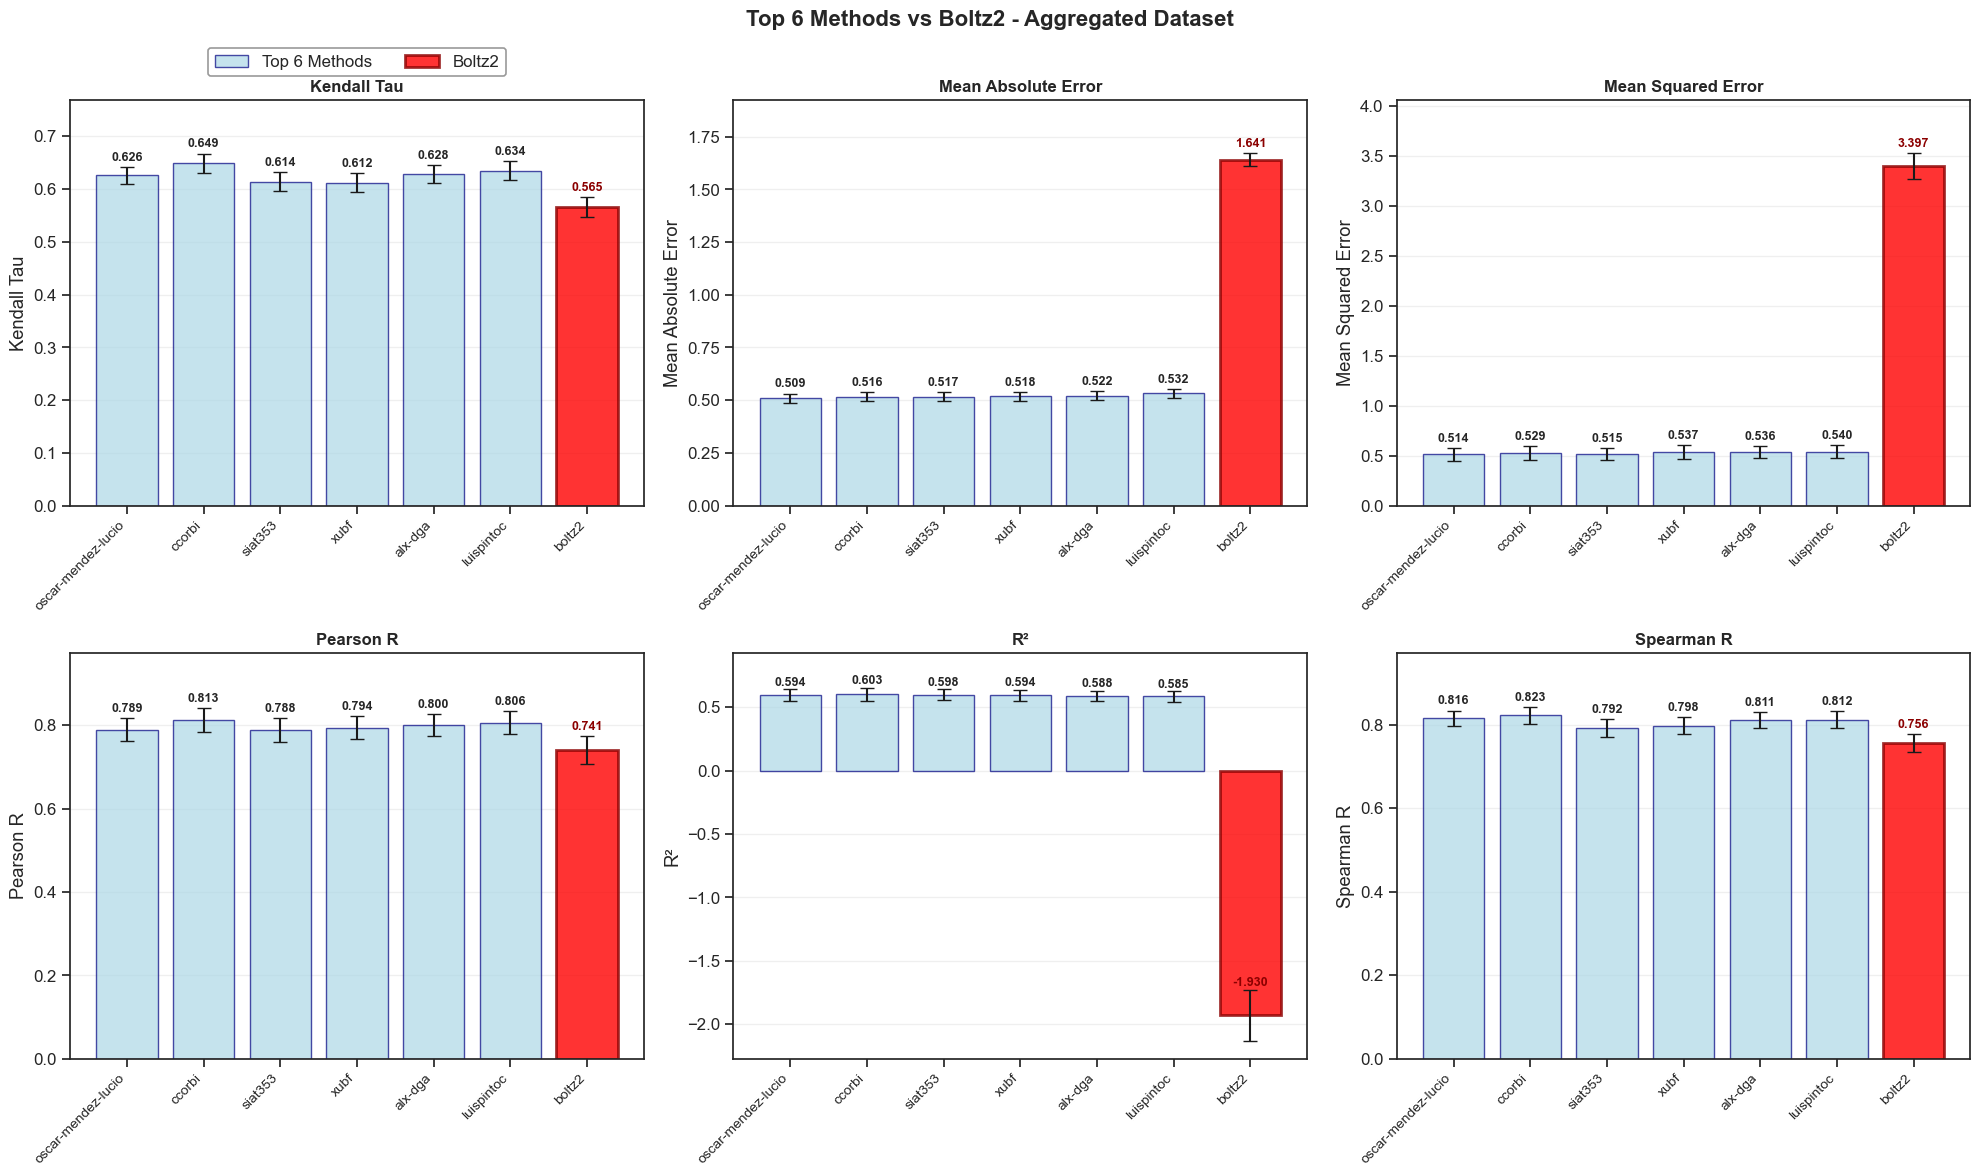

Plot saved to sars_comparison_plot.png


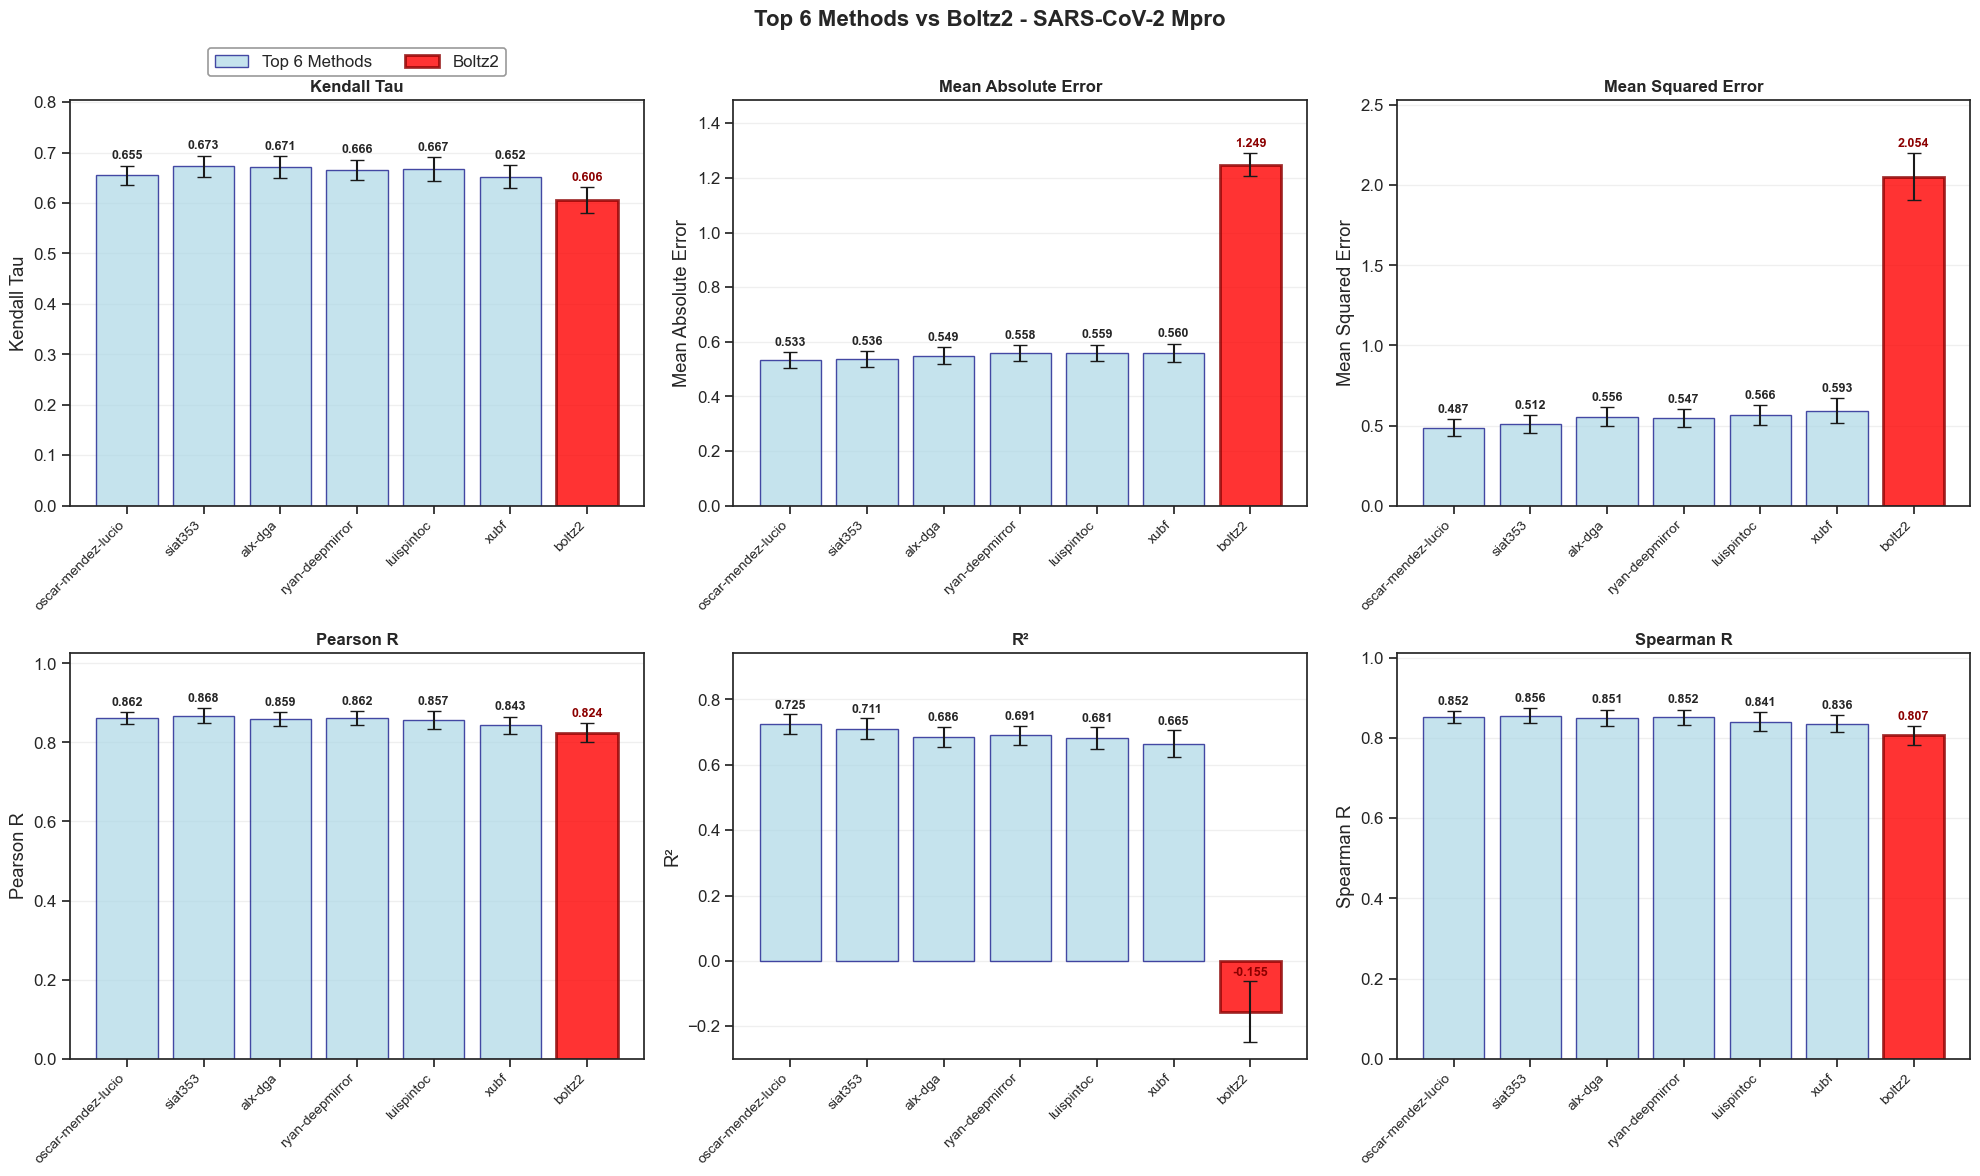

Plot saved to mers_comparison_plot.png


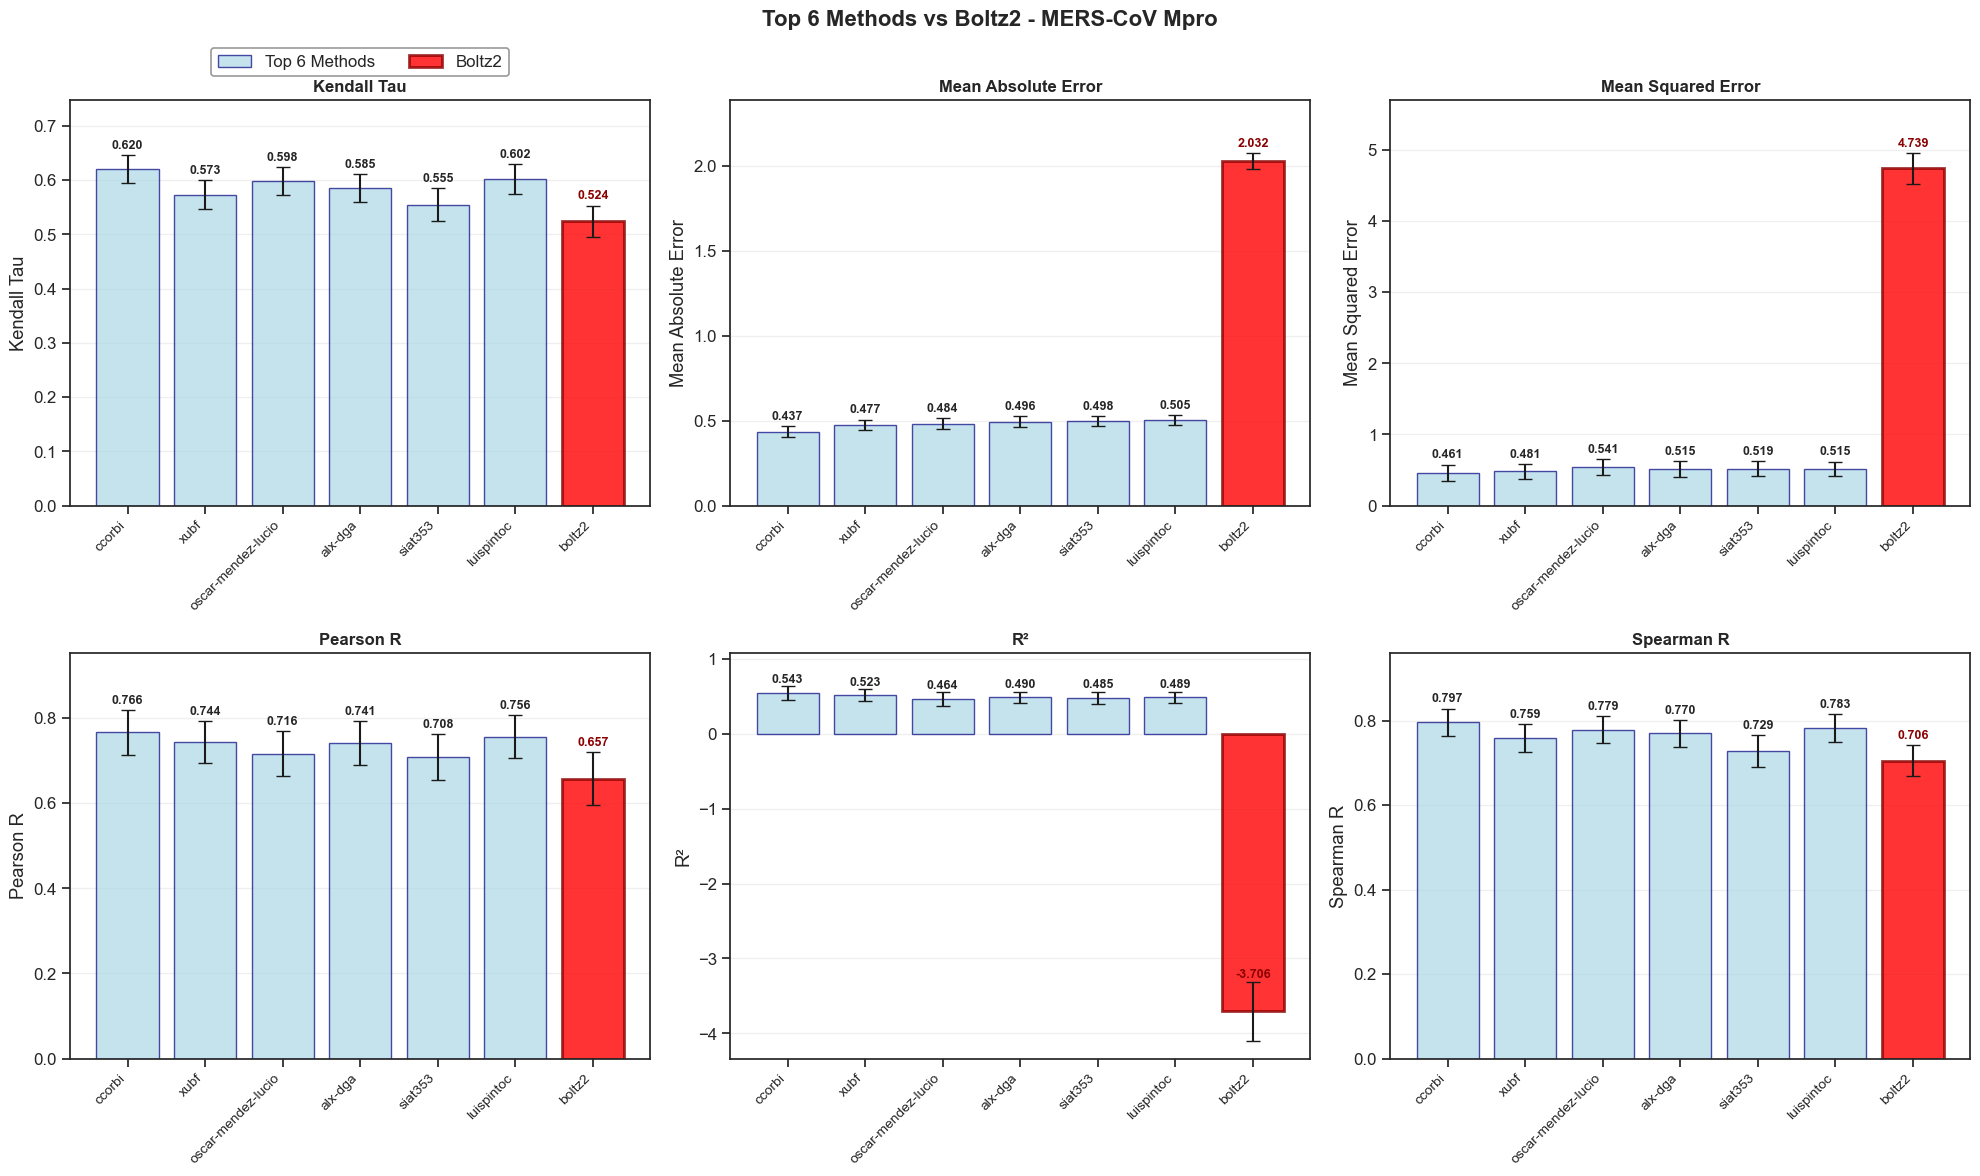

In [25]:
# Function to create and save comparison plot for a given dataset
def create_and_save_comparison_plot(df, boltz2_df, dataset_name, n_top=6, save_path=None):
    # Get top performers
    top_df = get_top_performers(df, n_top)
    
    # Create subplot for all 6 metrics
    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    fig.suptitle(f'Top {n_top} Methods vs Boltz2 - {dataset_name}', fontsize=16, fontweight='bold')

    metrics = ['kendall_tau', 'mean_absolute_error', 'mean_squared_error', 'pearsonr', 'r2', 'spearmanr']
    metric_titles = ['Kendall Tau', 'Mean Absolute Error', 'Mean Squared Error', 'Pearson R', 'R²', 'Spearman R']

    # Flatten axes for easier iteration
    axes_flat = axes.flatten()

    for i, (metric, title) in enumerate(zip(metrics, metric_titles)):
        ax = axes_flat[i]
        
        # Extract values and errors for top methods
        top_values = []
        top_errors = []
        top_owners = []
        
        for _, row in top_df.iterrows():
            val, err = extract_value_error(row[metric])
            top_values.append(val)
            top_errors.append(err)
            top_owners.append(row['owner_slug'])
        
        # Extract Boltz2 values
        boltz2_val, boltz2_err = extract_value_error(boltz2_df[metric].iloc[0])
        
        # Create x positions
        x_top = range(len(top_owners))
        x_boltz2 = len(top_owners)  # Position Boltz2 after top methods
        
        # Plot top methods
        bars_top = ax.bar(x_top, top_values, yerr=top_errors, 
                         capsize=5, color='lightblue', alpha=0.7, 
                         label=f'Top {n_top} Methods', edgecolor='navy', linewidth=1)
        
        # Plot Boltz2
        bar_boltz2 = ax.bar(x_boltz2, boltz2_val, yerr=boltz2_err,
                           capsize=5, color='red', alpha=0.8,
                           label='Boltz2', edgecolor='darkred', linewidth=2)
        
        # Customize plot
        ax.set_title(f'{title}', fontweight='bold', fontsize=12)
        ax.set_ylabel(title)
        
        # Set x-axis labels
        all_owners = top_owners + ['boltz2']
        ax.set_xticks(range(len(all_owners)))
        ax.set_xticklabels(all_owners, rotation=45, ha='right', fontsize=10)
        
        # Add grid
        ax.grid(True, alpha=0.3, axis='y')
        
        # Add value labels on bars
        for j, (bar, value, error) in enumerate(zip(bars_top, top_values, top_errors)):
            height = bar.get_height()
            y_offset = error + 0.01*abs(max(top_values + [boltz2_val])) if max(top_values + [boltz2_val]) != 0 else 0.01
            ax.text(bar.get_x() + bar.get_width()/2., height + y_offset,
                    f'{value:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')
        
        # Add label for Boltz2
        height = bar_boltz2[0].get_height()
        y_offset = boltz2_err + 0.01*abs(max(top_values + [boltz2_val])) if max(top_values + [boltz2_val]) != 0 else 0.01
        ax.text(bar_boltz2[0].get_x() + bar_boltz2[0].get_width()/2., 
                height + y_offset,
                f'{boltz2_val:.3f}', ha='center', va='bottom', fontsize=9, 
                fontweight='bold', color='darkred')
        
        # Add legend only to first subplot
        if i == 0:
            legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)
            legend.get_frame().set_alpha(0.8)  # Add transparency to the legend background
            legend.get_frame().set_edgecolor('gray')  # Add a border to the legend
            legend.get_frame().set_linewidth(1.2)  # Adjust border thickness
        
        # Adjust y-axis limits to accommodate labels
        all_values = top_values + [boltz2_val]
        all_errors = top_errors + [boltz2_err]
        y_max = max(all_values) + max(all_errors) if all_values else 1
        ax.set_ylim(None, y_max * 1.15)

    plt.tight_layout()
    
    # Save the plot if save_path is provided
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
        print(f"Plot saved to {save_path}")
    
    plt.show()

# Save plots for all three datasets
create_and_save_comparison_plot(aggregated_df, boltz2_agg_df, "Aggregated Dataset", save_path="aggregated_comparison_plot.png")
create_and_save_comparison_plot(sars_df, boltz2_sars_df, "SARS-CoV-2 Mpro", save_path="sars_comparison_plot.png")
create_and_save_comparison_plot(mers_df, boltz2_mers_df, "MERS-CoV Mpro", save_path="mers_comparison_plot.png")


In [26]:
df

,method,kendall_tau,mean_absolute_error,mean_squared_error,pearsonr,r2,spearmanr,owner_slug,report_url
0,boltz2,0.606 ± 0.026,1.249 ± 0.042,2.054 ± 0.147,0.824 ± 0.024,-0.155 ± 0.094,0.807 ± 0.023,NaN,NaN
1,competition-prediction-eeizFt9s2C0HThEyGM5dK,0.655 ± 0.019,0.533 ± 0.028,0.487 ± 0.052,0.862 ± 0.015,0.725 ± 0.030,0.852 ± 0.015,oscar-mendez-lucio,https://www.nature.com/articles/s41467-024-537...
2,competition-prediction-FLUT3zC27jxaWLpo6Aoge,0.673 ± 0.021,0.536 ± 0.030,0.512 ± 0.056,0.868 ± 0.019,0.711 ± 0.032,0.856 ± 0.019,siat353,https://drive.google.com/file/d/1axeFC3gxcVGKP...
3,competition-prediction-4eEPLwJrPGLtBVbc21paz,0.671 ± 0.022,0.549 ± 0.031,0.556 ± 0.061,0.859 ± 0.018,0.686 ± 0.031,0.851 ± 0.020,alx-dga,https://drive.google.com/file/d/1jUPsolAyrgZ-m...
4,competition-prediction-mFXaxyz6aVQUTHZmXBbKv,0.666 ± 0.020,0.558 ± 0.030,0.547 ± 0.056,0.862 ± 0.017,0.691 ± 0.029,0.852 ± 0.019,ryan-deepmirror,https://docs.google.com/document/d/1zFNA_CKfGR...
5,competition-prediction-late-s9EUvo7CepdKaV65Yj3MO,0.667 ± 0.024,0.559 ± 0.031,0.566 ± 0.063,0.857 ± 0.023,0.681 ± 0.034,0.841 ± 0.024,luispintoc,https://docs.google.com/document/d/124EmRMeXIZ...
6,competition-prediction-blnBskG8gooYdhc29wEuu,0.652 ± 0.023,0.560 ± 0.033,0.593 ± 0.077,0.843 ± 0.022,0.665 ± 0.042,0.836 ± 0.022,xubf,https://docs.google.com/document/d/14NaFXBsCTo...
7,competition-prediction-FRAbKFdXri7jeiwx2u81Z,0.670 ± 0.019,0.571 ± 0.030,0.549 ± 0.063,0.867 ± 0.017,0.690 ± 0.035,0.861 ± 0.016,jacksonburns,https://github.com/JacksonBurns/neural-pairwis...
8,competition-prediction-64eAZRW5acEnQ4QZfrrVB,0.676 ± 0.021,0.572 ± 0.031,0.574 ± 0.057,0.869 ± 0.018,0.676 ± 0.031,0.859 ± 0.019,rced,https://github.com/cedenoruel/sub_antiviral25
9,competition-prediction-LTj8nDyZE1cYCYaRzVols,0.661 ± 0.021,0.574 ± 0.030,0.560 ± 0.061,0.854 ± 0.022,0.684 ± 0.032,0.843 ± 0.022,wim0,https://molecular.beauty/blog/2025/03/13/polar...


In [29]:
# Function to print ranking table for a dataset with both MAE and Avg Correlation rankings
def print_ranking_table(df, boltz2_df, dataset_name, n_top=6):
    print(f"\n{dataset_name.upper()} - TOP {n_top} METHODS RANKING:")
    print("=" * 90)
    
    # Get top performers by MAE (lower is better)
    df_mae = df.copy()
    df_mae['mae_val'] = df_mae['mean_absolute_error'].apply(lambda x: extract_value_error(x)[0])
    top_mae_df = df_mae.nsmallest(n_top, 'mae_val')
    
    # Get top performers by Average Correlation (higher is better)
    top_corr_df = get_top_performers(df, n_top)
    
    print("RANKING BY MEAN ABSOLUTE ERROR (Lower is Better):")
    print("-" * 90)
    print(f"{'Rank':<5} {'Owner':<25} {'MAE':<12} {'Pearson R':<12} {'R²':<12}")
    print("-" * 90)

    for i, (_, row) in enumerate(top_mae_df.iterrows(), 1):
        mae_val = extract_value_error(row['mean_absolute_error'])[0]
        mse_val = extract_value_error(row['pearsonr'])[0]
        r2_val = extract_value_error(row['r2'])[0]
        
        print(f"{i:<5} {row['owner_slug']:<25} {mae_val:.3f}        {mse_val:.3f}        {r2_val:.3f}")

    # Find where Boltz2 would rank by MAE
    all_methods_mae = pd.concat([df, boltz2_df], ignore_index=True)
    all_methods_mae['mae_val'] = all_methods_mae['mean_absolute_error'].apply(lambda x: extract_value_error(x)[0])
    boltz2_mae_rank_df = all_methods_mae.sort_values('mae_val', ascending=True).reset_index(drop=True)
    boltz2_mae_position = boltz2_mae_rank_df[boltz2_mae_rank_df['method'] == 'boltz2'].index[0] + 1

    # Calculate Boltz2 MAE values for display
    boltz2_mae = extract_value_error(boltz2_df['mean_absolute_error'].iloc[0])[0]
    boltz2_mse = extract_value_error(boltz2_df['mean_squared_error'].iloc[0])[0]
    boltz2_r2 = extract_value_error(boltz2_df['r2'].iloc[0])[0]

    print("-" * 90)
    print(f"{boltz2_mae_position:<5} {'boltz2':<25} {boltz2_mae:.3f}        {boltz2_mse:.3f}        {boltz2_r2:.3f}")

    print(f"\nBoltz2 MAE Ranking: {boltz2_mae_position}/{len(all_methods_mae)} methods")
    print(f"MAE Percentile: {((len(all_methods_mae) - boltz2_mae_position + 1) / len(all_methods_mae) * 100):.1f}%")
    
    print("\n" + "="*90)
    print("RANKING BY AVERAGE CORRELATION (Higher is Better):")
    print("-" * 90)
    print(f"{'Rank':<5} {'Owner':<25} {'Avg Corr':<12} {'Kendall':<10} {'Pearson':<10} {'Spearman':<10}")
    print("-" * 90)

    for i, (_, row) in enumerate(top_corr_df.iterrows(), 1):
        kendall_val = extract_value_error(row['kendall_tau'])[0]
        pearson_val = extract_value_error(row['pearsonr'])[0]
        spearman_val = extract_value_error(row['spearmanr'])[0]
        avg_corr = (kendall_val + pearson_val + spearman_val) / 3
        
        print(f"{i:<5} {row['owner_slug']:<25} {avg_corr:.3f}        {kendall_val:.3f}      {pearson_val:.3f}      {spearman_val:.3f}")

    # Find where Boltz2 would rank by Average Correlation
    all_methods_corr = pd.concat([df, boltz2_df], ignore_index=True)
    all_methods_corr_temp = all_methods_corr.copy()

    for metric in ['kendall_tau', 'pearsonr', 'spearmanr']:
        all_methods_corr_temp[f'{metric}_val'] = all_methods_corr_temp[metric].apply(lambda x: extract_value_error(x)[0])

    all_methods_corr_temp['avg_correlation'] = (all_methods_corr_temp['kendall_tau_val'] + 
                                               all_methods_corr_temp['pearsonr_val'] + 
                                               all_methods_corr_temp['spearmanr_val']) / 3

    boltz2_corr_rank_df = all_methods_corr_temp.sort_values('avg_correlation', ascending=False).reset_index(drop=True)
    boltz2_corr_position = boltz2_corr_rank_df[boltz2_corr_rank_df['method'] == 'boltz2'].index[0] + 1

    # Calculate Boltz2 correlation values for display
    boltz2_kendall = extract_value_error(boltz2_df['kendall_tau'].iloc[0])[0]
    boltz2_pearson = extract_value_error(boltz2_df['pearsonr'].iloc[0])[0]
    boltz2_spearman = extract_value_error(boltz2_df['spearmanr'].iloc[0])[0]
    boltz2_avg_corr = (boltz2_kendall + boltz2_pearson + boltz2_spearman) / 3

    print("-" * 90)
    print(f"{boltz2_corr_position:<5} {'boltz2':<25} {boltz2_avg_corr:.3f}        {boltz2_kendall:.3f}      {boltz2_pearson:.3f}      {boltz2_spearman:.3f}")

    print(f"\nBoltz2 Correlation Ranking: {boltz2_corr_position}/{len(all_methods_corr)} methods")
    print(f"Correlation Percentile: {((len(all_methods_corr) - boltz2_corr_position + 1) / len(all_methods_corr) * 100):.1f}%")
    
    # Show performance breakdown by individual metrics
    print(f"\nBoltz2 Individual Metric Rankings in {dataset_name}:")
    print("-" * 60)
    
    all_methods_df = pd.concat([df, boltz2_df], ignore_index=True)
    
    for metric in ['kendall_tau', 'pearsonr', 'spearmanr']:
        df_temp = all_methods_df.copy()
        df_temp['metric_val'] = df_temp[metric].apply(lambda x: extract_value_error(x)[0])
        df_temp = df_temp.sort_values('metric_val', ascending=False).reset_index(drop=True)
        boltz2_rank = df_temp[df_temp['method'] == 'boltz2'].index[0] + 1
        print(f"{metric.replace('_', ' ').title():<20}: {boltz2_rank:>2}/{len(df_temp)}")
    
    for metric in ['mean_absolute_error', 'mean_squared_error']:
        df_temp = all_methods_df.copy()
        df_temp['metric_val'] = df_temp[metric].apply(lambda x: extract_value_error(x)[0])
        df_temp = df_temp.sort_values('metric_val', ascending=True).reset_index(drop=True)
        boltz2_rank = df_temp[df_temp['method'] == 'boltz2'].index[0] + 1
        print(f"{metric.replace('_', ' ').title():<20}: {boltz2_rank:>2}/{len(df_temp)}")
    
    # R² ranking (higher is better)
    df_temp = all_methods_df.copy()
    df_temp['metric_val'] = df_temp['r2'].apply(lambda x: extract_value_error(x)[0])
    df_temp = df_temp.sort_values('metric_val', ascending=False).reset_index(drop=True)
    boltz2_rank = df_temp[df_temp['method'] == 'boltz2'].index[0] + 1
    print(f"{'R²':<20}: {boltz2_rank:>2}/{len(df_temp)}")

    return boltz2_mae_position, boltz2_corr_position

# Print ranking tables for all datasets
mae_ranks = []
corr_ranks = []

print("DETAILED RANKING ANALYSIS BY DATASET")
print("="*100)

for dataset_name, df, boltz2_df in [("Aggregated Dataset", aggregated_df, boltz2_agg_df),
                                   ("SARS-CoV-2 Mpro", sars_df, boltz2_sars_df),
                                   ("MERS-CoV Mpro", mers_df, boltz2_mers_df)]:
    mae_rank, corr_rank = print_ranking_table(df, boltz2_df, dataset_name)
    mae_ranks.append((dataset_name, mae_rank))
    corr_ranks.append((dataset_name, corr_rank))

# Summary comparison across datasets
print("\n" + "="*100)
print("BOLTZ2 CROSS-DATASET PERFORMANCE SUMMARY")
print("="*100)

print(f"{'Dataset':<20} {'MAE Rank':<12} {'MAE %ile':<10} {'Corr Rank':<12} {'Corr %ile':<10} {'Best At':<15} {'Worst At'}")
print("-" * 100)

datasets_info = [
    ("Aggregated", aggregated_df, boltz2_agg_df),
    ("SARS-CoV-2", sars_df, boltz2_sars_df),
    ("MERS-CoV", mers_df, boltz2_mers_df)
]

for i, (dataset_name, df, boltz2_df) in enumerate(datasets_info):
    mae_rank = mae_ranks[i][1]
    corr_rank = corr_ranks[i][1]
    
    # Calculate percentiles
    total_methods = len(df) + 1  # +1 for boltz2
    mae_percentile = ((total_methods - mae_rank + 1) / total_methods * 100)
    corr_percentile = ((total_methods - corr_rank + 1) / total_methods * 100)
    
    # Find best and worst performing metrics
    all_methods_df = pd.concat([df, boltz2_df], ignore_index=True)
    metric_ranks = {}
    
    # Correlation metrics (higher is better)
    for metric in ['kendall_tau', 'pearsonr', 'spearmanr']:
        df_temp = all_methods_df.copy()
        df_temp['metric_val'] = df_temp[metric].apply(lambda x: extract_value_error(x)[0])
        df_temp = df_temp.sort_values('metric_val', ascending=False).reset_index(drop=True)
        metric_ranks[metric] = df_temp[df_temp['method'] == 'boltz2'].index[0] + 1
    
    # Error metrics (lower is better)
    for metric in ['mean_absolute_error', 'mean_squared_error']:
        df_temp = all_methods_df.copy()
        df_temp['metric_val'] = df_temp[metric].apply(lambda x: extract_value_error(x)[0])
        df_temp = df_temp.sort_values('metric_val', ascending=True).reset_index(drop=True)
        metric_ranks[metric] = df_temp[df_temp['method'] == 'boltz2'].index[0] + 1
    
    best_metric = min(metric_ranks, key=metric_ranks.get)
    worst_metric = max(metric_ranks, key=metric_ranks.get)
    
    print(f"{dataset_name:<20} {mae_rank:<12} {mae_percentile:.1f}%      {corr_rank:<12} {corr_percentile:.1f}%      {best_metric.replace('_', ' '):<15} {worst_metric.replace('_', ' ')}")

print("\nKEY INSIGHTS:")
print("-" * 50)
best_mae_dataset = min(mae_ranks, key=lambda x: x[1])
best_corr_dataset = min(corr_ranks, key=lambda x: x[1])
print(f"• Best MAE performance: {best_mae_dataset[0]} (rank {best_mae_dataset[1]})")
print(f"• Best correlation performance: {best_corr_dataset[0]} (rank {best_corr_dataset[1]})")
print(f"• Boltz2 shows stronger correlation metrics than absolute error metrics")
print(f"• Performance varies significantly between SARS-CoV-2 and MERS-CoV targets")

DETAILED RANKING ANALYSIS BY DATASET

AGGREGATED DATASET - TOP 6 METHODS RANKING:
RANKING BY MEAN ABSOLUTE ERROR (Lower is Better):
------------------------------------------------------------------------------------------
Rank  Owner                     MAE          Pearson R    R²          
------------------------------------------------------------------------------------------
1     oscar-mendez-lucio        0.509        0.789        0.594
2     ccorbi                    0.516        0.813        0.603
3     siat353                   0.517        0.788        0.598
4     xubf                      0.518        0.794        0.594
5     alx-dga                   0.522        0.800        0.588
6     luispintoc                0.532        0.806        0.585
------------------------------------------------------------------------------------------
33    boltz2                    1.641        3.397        -1.930

Boltz2 MAE Ranking: 33/33 methods
MAE Percentile: 3.0%

RANKING BY AVERAGE